In [1]:
import tsp
from time import time

In [52]:
lista = [2, 3, 54 ,7, 'hola', 'ninia', 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

lista.pop(lista.index('hola'))
print(lista)

[2, 3, 54, 7, 'ninia', 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


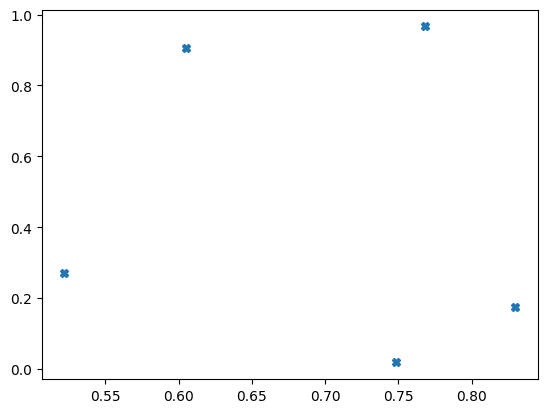

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
X = []

for i in range (N):
    X.append(np.random.rand(2))

X = np.array(X)

plt.plot(X.T[0],X.T[1], 'X')
plt.show()

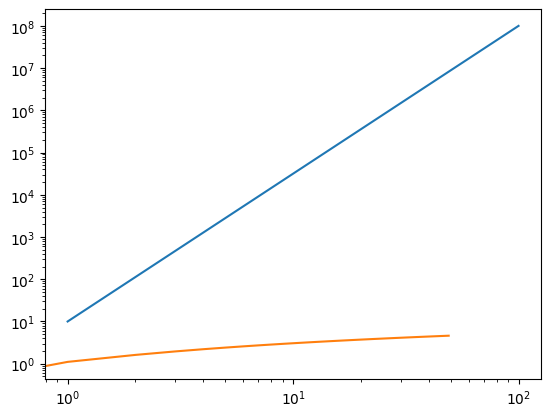

In [3]:
def funcion(x):
    return [x**3.5, x**4]


x = np.linspace(1,100)
plt.plot(x, 10*x**3.5, np.log(x))
plt.yscale('log')
plt.xscale('log')

plt.show()

In [10]:
optimo, dist = tsp.TSP(X)

print("distancia=", dist)
print("optimo=", optimo)

distancia= 2.125133899041831
optimo= [[0.82973061 0.17563596]
 [0.74856614 0.01764203]
 [0.52192356 0.27120743]
 [0.60469521 0.90628346]
 [0.76800925 0.96623323]
 [0.82973061 0.17563596]]


In [65]:
def t_ejecucion(n):
    X = []
    for i in range (n):
        X.append(np.random.rand(2))
    X = np.array(X)
    t0 = time()    
    tsp.TSP(X)
    t1 = time()
    return t1-t0

def t_2an(n):
    times = []
    for n in range(2,10):
        times.append(t_ejecucion(n))
        #print(f'{n}-> {times[-1]}')
    return times

def t_promedio(n, veces):
    times = []
    for n in range(veces):
        times.append(t_2an(n))
    times = np.array(times)
    return times.mean(axis=0)


In [66]:
times = []
for i in range(4):
    times.append(t_2an(4))
    print(np.round(times[-1],3))
times = np.array(times)

[0.000e+00 0.000e+00 1.000e-03 2.000e-03 9.000e-03 7.200e-02 2.830e-01
 2.013e+00]
[0.    0.    0.    0.    0.    0.031 0.226 2.01 ]
[0.    0.    0.    0.    0.    0.032 0.24  1.991]
[0.    0.    0.    0.016 0.    0.031 0.23  2.028]


In [67]:
times_m = times.mean(axis=0)


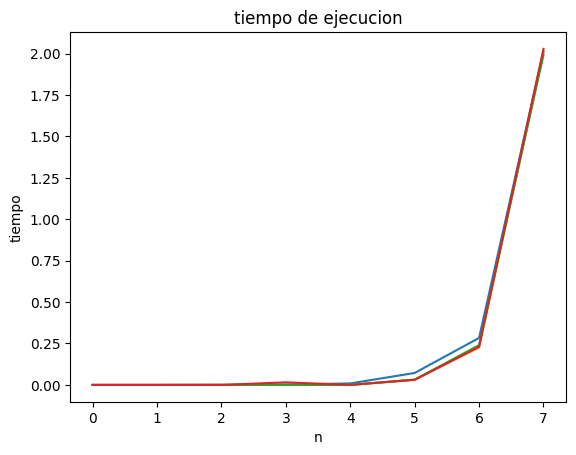

In [68]:
times_m = times.mean(axis=0)
plt.plot(times.T)
plt.xlabel("n")
plt.title("tiempo de ejecucion")
plt.ylabel("tiempo")
plt.show()

In [69]:
def time_vmc(n):
    times_vmc = []
    for j in range(2,n):
        X = []
        for i in range (j):
                X.append(np.random.rand(2))

        X = np.array(X)
        distancia_total, camino_aprox, tiempo = tsp.metodo_vecino_cercano(X)
        times_vmc.append(tiempo)
    return times_vmc

times_vmc = []
for i in range(2000):
    times_vmc.append(time_vmc(20))
times_vmc = np.array(times_vmc)
times_vmc_m = times_vmc.mean(axis=0)


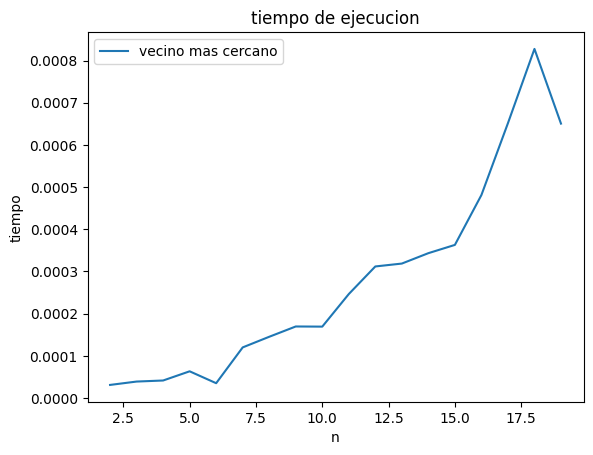

In [74]:
plt.plot(range(2,20), times_vmc_m, label="vecino mas cercano")
plt.xlabel("n")
plt.title("tiempo de ejecucion")
plt.ylabel("tiempo")
plt.legend()
plt.show()

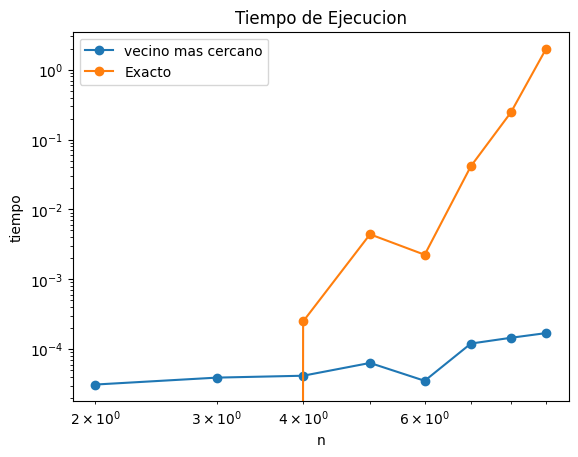

In [71]:

plt.plot(range(2,10),times_vmc_m[:8],'-o', label="vecino mas cercano")
plt.plot(range(2,10), times_m,'-o', label="Exacto")
plt.yscale('log')
plt.xscale('log')

plt.xlabel("n")
plt.title("Tiempo de Ejecucion")
plt.ylabel("tiempo")
plt.legend()
plt.show()

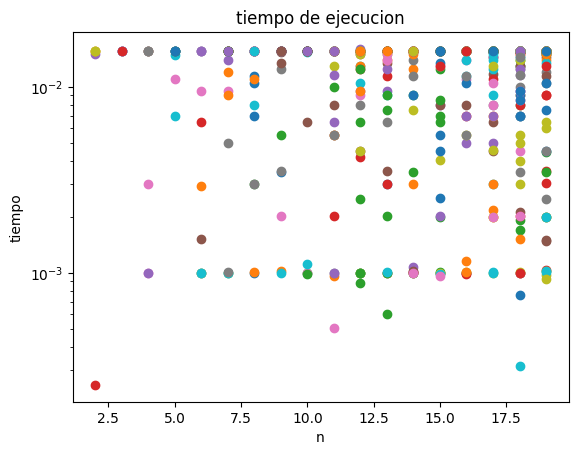

In [72]:
plt.plot(range(2,20), times_vmc.T,'o', label="vecino mas cercano")
plt.xlabel("n")
plt.title("tiempo de ejecucion")
plt.yscale('log')
plt.ylabel("tiempo")
plt.show()


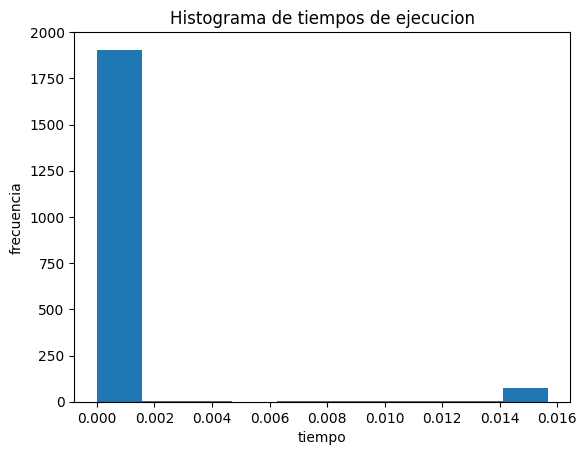

In [73]:
plt.hist(times_vmc.T[-1], label="vecino mas cercano", bins=10)
plt.title("Histograma de tiempos de ejecucion")
plt.xlabel("tiempo")
plt.ylabel("frecuencia")
plt.show()